# Velocities
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 12/19/2022          |
| Updated | 01/03/2023          |

## **Figure 7.** (Gas)

Case	 Π	ux_0	<ux>	σ_ux	σ_uz
		(Πc_s)	(Πc_s)	(Πc_s)	(Πc_s)
 (1)	(2)	(3)	(4)	(5)	(6)
AB	0.01	0.05	0.11	0.23	0.17
AB	0.02	0.05	0.11	0.22	0.15
AB	0.05	0.05	0.11	0.21	0.15


/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


AB	0.1	0.05	0.11	0.22	0.15
BA	0.01	0.16	0.07	0.21	1.17
BA	0.02	0.16	0.09	0.20	1.29
BA	0.05	0.16	0.11	0.21	0.77
BA	0.1	0.16	0.13	0.25	0.63


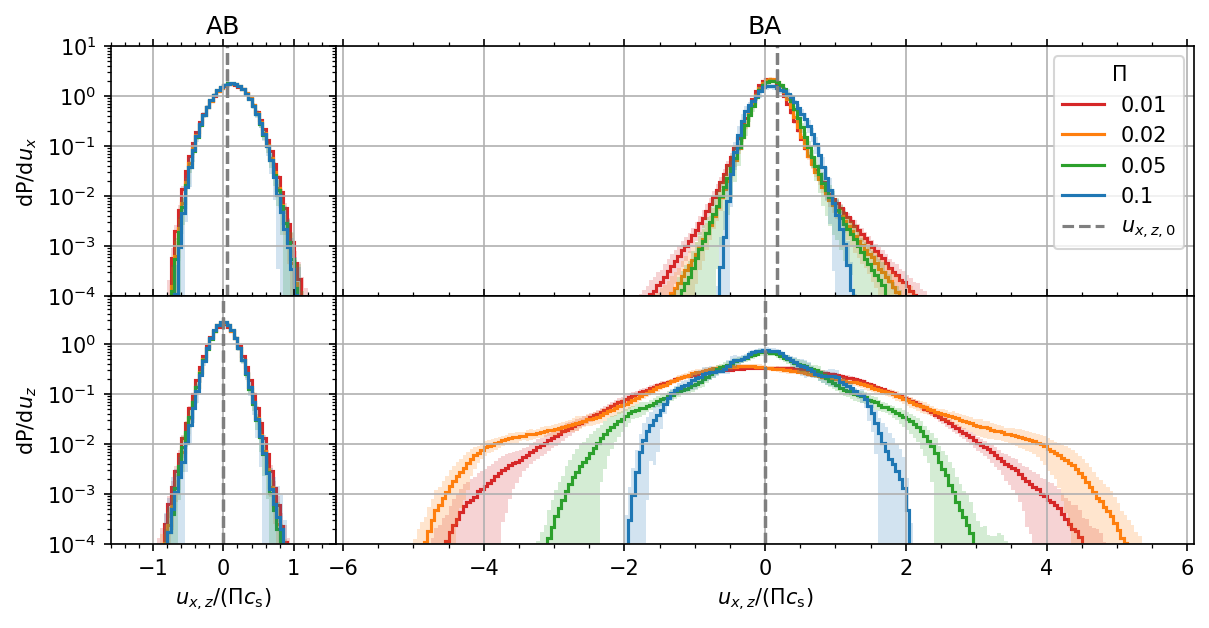

In [1]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

ABxlim, BAxlim = 1.6, 6.1
dPdux_ylim, dPduz_ylim = (1e-4, 1e1), (1e-4, 9e0)
dPdux_ydiff = np.log10(dPdux_ylim[1]) - np.log10(dPdux_ylim[0])
dPduz_ydiff = np.log10(dPduz_ylim[1]) - np.log10(dPduz_ylim[0])
h_ratio, w_ratio = dPdux_ydiff/dPduz_ydiff, ABxlim/BAxlim
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 4.31),
                        height_ratios=[h_ratio, 1], width_ratios=[w_ratio, 1],
                        dpi=150)
# twin_axs = [[axs[0][0].twinx(), axs[0][1].twinx()],
#             [axs[1][0].twinx(), axs[1][1].twinx()]]
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

print(f'Case\t Π\tux_0\t<ux>\tσ_ux\tσ_uz')
print(f'\t\t(Πc_s)\t(Πc_s)\t(Πc_s)\t(Πc_s)')
print(f' (1)\t(2)\t(3)\t(4)\t(5)\t(6)')
for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']

        # Load velocity results
        ux0 = hst['1-mom'][0]/hst['mass'][0]/float(Pi[0])/c_s
        uz0 = hst['2-mom'][0]/hst['mass'][0]/float(Pi[0])/c_s
        npz = np.load(f'{path}/npz/velocities.npz')
        bin_edges = npz['bin_edges']
        avg_uxs, avg_uzs = npz['avg_uxs'], npz['avg_uzs']
        std_uxs, std_uzs = npz['std_uxs'], npz['std_uzs']
        bin_avg_uxs, bin_avg_uzs = npz['bin_avg_uxs'], npz['bin_avg_uzs']
        bin_std_uxs, bin_std_uzs = npz['bin_std_uxs'], npz['bin_std_uzs']
        bin_high_uxs = bin_avg_uxs + bin_std_uxs
        bin_low_uxs  = bin_avg_uxs - bin_std_uxs
        bin_high_uzs = bin_avg_uzs + bin_std_uzs
        bin_low_uzs  = bin_avg_uzs - bin_std_uzs
        print(f'{case}\t{float(Pi[0])}\t{ux0:.2f}\t{avg_uxs:.2f}\t{std_uxs:.2f}\t{std_uzs:.2f}')

        # Load density results
        bin_avg_rhoxs = npz['bin_avg_rhoxs']
        bin_avg_rhozs = npz['bin_avg_rhozs']
        bin_std_rhoxs = npz['bin_std_rhoxs']
        bin_std_rhozs = npz['bin_std_rhozs']
        bin_high_rhoxs = bin_avg_rhoxs + bin_std_rhoxs
        bin_low_rhoxs = bin_avg_rhoxs - bin_std_rhoxs
        bin_high_rhozs = bin_avg_rhozs + bin_std_rhozs
        bin_low_rhozs = bin_avg_rhozs - bin_std_rhozs

        # Plot histograms, equilibrium velocities
        # if Pi[0] == '0.01':
        #     axs[0][i].stairs(bin_high_rhoxs, bin_edges,
        #                     baseline=bin_low_rhoxs, fill=True, color=Pi[1],
        #                     alpha=0.1)
        #     axs[1][i].stairs(bin_high_rhozs, bin_edges,
        #                     baseline=bin_low_rhozs, fill=True, color=Pi[1],
        #                     alpha=0.1)
        # twin_axs[0][i].stairs(bin_avg_rhoxs, bin_edges, color=Pi[1],
        #                       lw=1.5, ls=':', alpha=0.5)
        # twin_axs[1][i].stairs(bin_avg_rhozs, bin_edges, color=Pi[1],
        #                         lw=1.5, ls=':', alpha=0.5)
        axs[0][i].stairs(bin_avg_uxs, bin_edges, color=Pi[1], lw=1.5,
                         label=float(Pi[0]))
        axs[0][i].stairs(bin_high_uxs, bin_edges, baseline=bin_low_uxs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[0][i].axvline(ux0, c='tab:gray', ls='dashed')
        axs[1][i].stairs(bin_avg_uzs, bin_edges, color=Pi[1], lw=1.5)
        axs[1][i].stairs(bin_high_uzs, bin_edges, baseline=bin_low_uzs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[1][i].axvline(uz0, c='tab:gray', ls='dashed')

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

# for ax in np.asarray(twin_axs).flat:
#     ax.minorticks_on()
#     ax.tick_params(axis='y', which='both', color='tab:gray',
#                    labelcolor='tab:gray')

axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}u_x$', yscale='log',
              ylim=dPdux_ylim)
axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$u_{x,z,0}$')
# axs[0][1].plot([], [], color='tab:gray', ls=':', alpha=0.5,
#                label=r'$\rho_\mathrm{g}$')
axs[0][1].legend(loc='upper right', title=r'$\Pi$')
axs[0][1].set(title='BA')
axs[1][0].set(xlabel=r'$u_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-ABxlim, ABxlim),
              ylabel=r'$\mathrm{dP}/\mathrm{d}u_z$', yscale='log', ylim=dPduz_ylim)
axs[1][1].set(xlabel=r'$u_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-BAxlim, BAxlim))
# twin_axs[0][0].yaxis.set_major_locator(ticker.NullLocator())
# twin_axs[1][0].yaxis.set_major_locator(ticker.NullLocator())
# twin_axs[0][1].set(ylim=ABylim, yscale='log')
# twin_axs[1][1].set(ylim=BAylim, yscale='log')
# twin_axs[0][1].set_ylabel(r'$\overline{\rho_\mathrm{g,bin}} / \rho_\mathrm{g,0}$',
#                           alpha=0.5)
# twin_axs[1][1].set_ylabel(r'$\overline{\rho_\mathrm{g,bin}} / \rho_\mathrm{g,0}$',
#                           alpha=0.5)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/gas_velocities.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig(f'figs/png/gas_velocities.png', bbox_inches='tight', pad_inches=0.01, dpi=1200)


## **Figure 9.** (Dust, Radial)

Case	 Π	vx_0	<vx>	σ_vx
		(Πc_s)	(Πc_s)	(Πc_s)
 (1)	(2)	(7)	(8)	(9)
AB	0.01	-0.05	-0.11	0.18
AB	0.02	-0.05	-0.11	0.18
AB	0.05	-0.05	-0.11	0.17
AB	0.1	-0.05	-0.11	0.17
BA	0.01	-0.82	-0.33	0.36
BA	0.02	-0.82	-0.47	0.37


/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


BA	0.05	-0.82	-0.57	0.35
BA	0.1	-0.82	-0.64	0.35


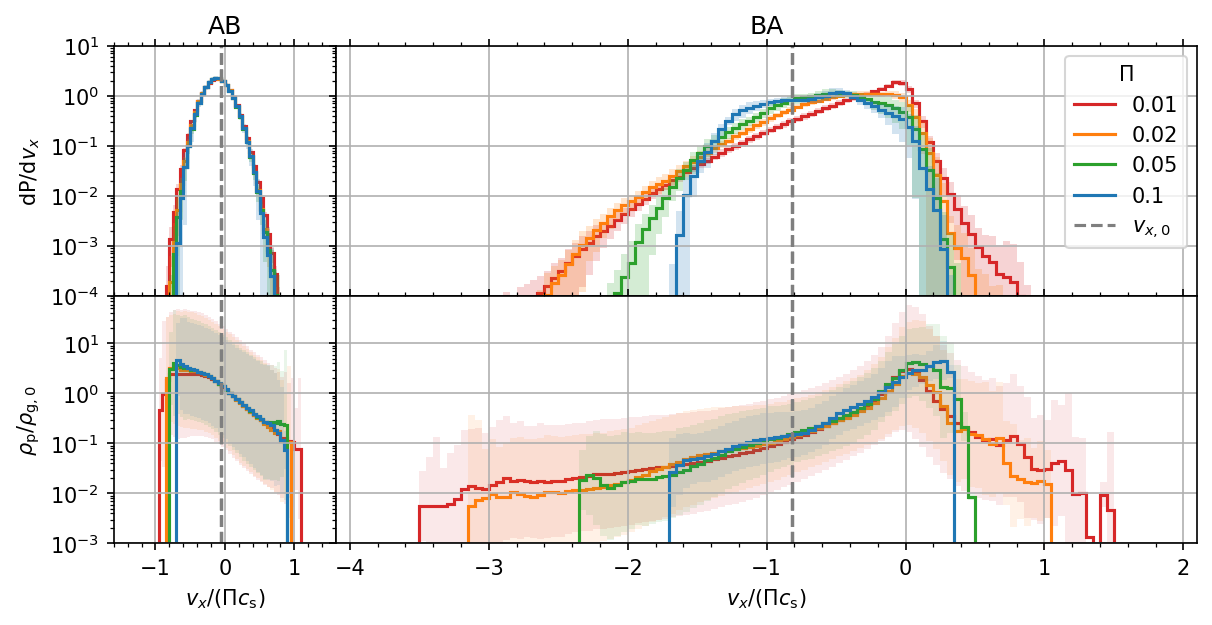

In [2]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

ABxlim, BAxlim = 1.6, (-4.1, 2.1)
dPdvx_ylim, rhop_ylim = (1e-4, 1e1), (1e-3, 9e1)
dPdvx_ydiff = np.log10(dPdvx_ylim[1]) - np.log10(dPdvx_ylim[0])
rhop_ydiff = np.log10(rhop_ylim[1]) - (np.log10(rhop_ylim[0]))
h_ratio, w_ratio = dPdvx_ydiff/rhop_ydiff, ABxlim/(BAxlim[1] - BAxlim[0])
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 4.31),
                        height_ratios=[h_ratio, 1], width_ratios=[w_ratio, 1],
                        dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

print(f'Case\t Π\tvx_0\t<vx>\tσ_vx')
print(f'\t\t(Πc_s)\t(Πc_s)\t(Πc_s)')
print(f' (1)\t(2)\t(7)\t(8)\t(9)')
for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']

        # Load velocity and density statistics results
        vx0 = hst['vp1'][0]/Np/float(Pi[0])/c_s
        npz = np.load(f'{path}/npz/velocities.npz')
        avg_vxs, std_vxs = npz['avg_vxs'], npz['std_vxs']
        bin_hi_vxs = npz['bin_avg_vxs'] + npz['bin_std_vxs']
        bin_lo_vxs = npz['bin_avg_vxs'] - npz['bin_std_vxs']
        print(f'{case}\t{float(Pi[0])}\t{vx0:.2f}\t{avg_vxs:.2f}\t{std_vxs:.2f}')
        bin_hi_rhopxs = npz['bin_avg_rhopxs']*np.exp(npz['bin_log_std_rhopxs'])
        bin_hi2_rhopxs = npz['bin_avg_rhopxs'] + npz['bin_std_rhopxs']
        bin_lo_rhopxs = npz['bin_avg_rhopxs']/np.exp(npz['bin_log_std_rhopxs'])

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(npz['bin_avg_vxs'], npz['bin_edges'], color=Pi[1],
                         label=float(Pi[0]), lw=1.5)
        axs[0][i].stairs(bin_hi_vxs, npz['bin_edges'], baseline=bin_lo_vxs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[0][i].axvline(vx0, c='tab:gray', ls='dashed')
        axs[1][i].stairs(npz['bin_avg_rhopxs'], npz['bin_edges'], color=Pi[1],
                         lw=1.5)
        # if Pi[0] == '0.10':
        axs[1][i].stairs(bin_hi_rhopxs, npz['bin_edges'], fill=True, alpha=0.1,
                        color=Pi[1], baseline=bin_lo_rhopxs)
        # axs[1][i].stairs(bin_hi2_rhopxs, npz['bin_edges'], fill=True, alpha=0.4,
        #                 color=Pi[1], baseline=npz['bin_avg_rhopxs'])
        axs[1][i].axvline(vx0, c='tab:gray', ls='dashed')

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}v_x$',
              ylim=dPdvx_ylim, yscale='log')
axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$v_{x,0}$')
axs[0][1].legend(loc='upper right', title=r'$\Pi$')
axs[0][1].set(title='BA')
axs[1][0].set(xlabel=r'$v_x/(\Pi c_\mathrm{s})$', xlim=(-ABxlim, ABxlim),
              ylabel=r'$\rho_\mathrm{p} / \rho_\mathrm{g,0}$', ylim=rhop_ylim,
              yscale='log')
axs[1][1].set(xlabel=r'$v_x/(\Pi c_\mathrm{s})$', xlim=BAxlim)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/dust_radial_velocities.pdf', bbox_inches='tight',
            pad_inches=0.01)
plt.savefig(f'figs/png/dust_radial_velocities.png', bbox_inches='tight',
            pad_inches=0.01, dpi=1200)


## **Figure 10.** (Dust, Vertical)

Case	 Π	σ_vz
		(Πc_s)
 (1)	(2)	(10)
AB	0.01	0.15
AB	0.02	0.14
AB	0.05	0.13
AB	0.1	0.13
BA	0.01	1.47
BA	0.02	1.84


/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


BA	0.05	1.01
BA	0.1	0.63


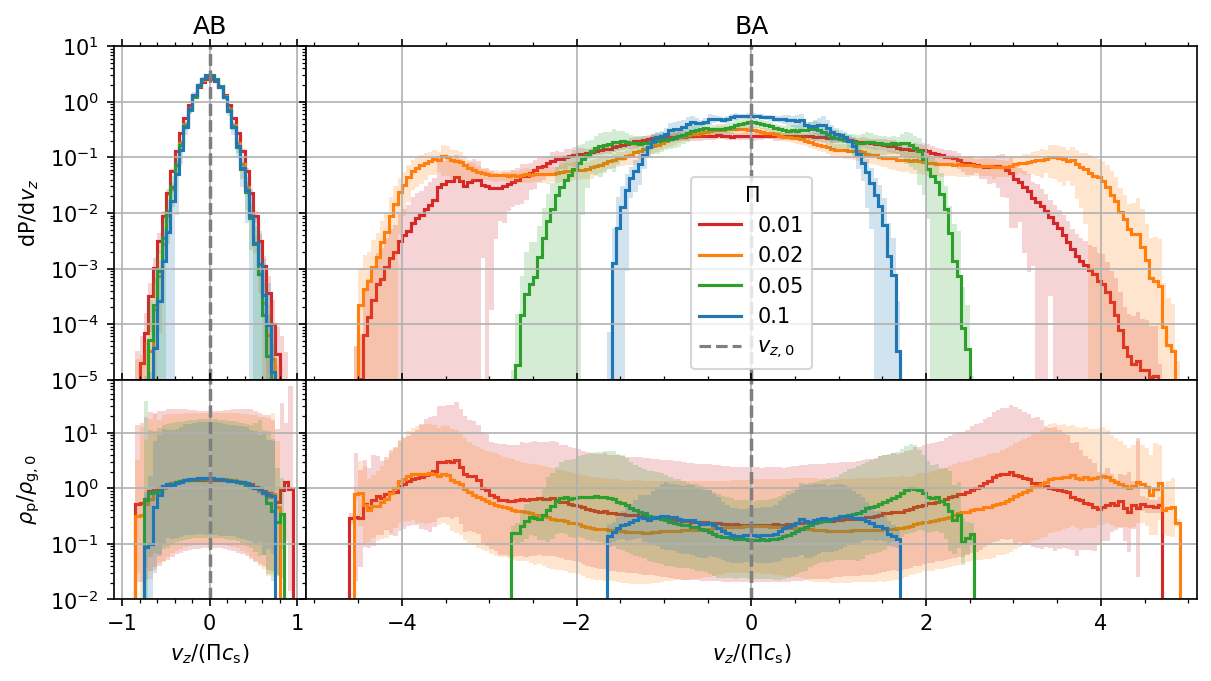

In [3]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

ABxlim, BAxlim = 1.1, 5.1
dPdvz_ylim, rhop_ylim = (1e-5, 1e1), (1e-2, 9e1)
dPdvz_ydiff = np.log10(dPdvz_ylim[1]) - np.log10(dPdvz_ylim[0])
rhop_ydiff = np.log10(rhop_ylim[1]) - (np.log10(rhop_ylim[0]))
h_ratio, w_ratio = dPdvz_ydiff/rhop_ydiff, ABxlim/BAxlim
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 4.79),
                        height_ratios=[h_ratio, 1], width_ratios=[w_ratio, 1],
                        dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

print(f'Case\t Π\tσ_vz')
print(f'\t\t(Πc_s)')
print(f' (1)\t(2)\t(10)')
for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']

        # Load velocity and density statistics results
        vz0 = hst['vp2'][0]/Np/float(Pi[0])/c_s
        npz = np.load(f'{path}/npz/velocities.npz')
        avg_vzs, std_vzs = npz['avg_vzs'], npz['std_vzs']
        bin_hi_vzs = npz['bin_avg_vzs'] + npz['bin_std_vzs']
        bin_lo_vzs = npz['bin_avg_vzs'] - npz['bin_std_vzs']
        print(f'{case}\t{float(Pi[0])}\t{std_vzs:.2f}')
        bin_hi_rhopzs = npz['bin_avg_rhopzs']*np.exp(npz['bin_log_std_rhopzs'])
        bin_lo_rhopzs = npz['bin_avg_rhopzs']/np.exp(npz['bin_log_std_rhopzs'])

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(npz['bin_avg_vzs'], npz['bin_edges'], color=Pi[1],
                         label=float(Pi[0]), lw=1.5)
        axs[0][i].stairs(bin_hi_vzs, npz['bin_edges'], baseline=bin_lo_vzs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[0][i].axvline(vz0, c='tab:gray', ls='dashed')
        axs[1][i].stairs(npz['bin_avg_rhopzs'], npz['bin_edges'], color=Pi[1],
                         lw=1.5)
        axs[1][i].stairs(bin_hi_rhopzs, npz['bin_edges'], fill=True, alpha=0.2,
                         color=Pi[1], baseline=bin_lo_rhopzs)
        axs[1][i].axvline(vz0, c='tab:gray', ls='dashed')

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}v_z$',
              ylim=dPdvz_ylim, yscale='log')
axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$v_{z,0}$')
axs[0][1].legend(loc='lower center', title=r'$\Pi$')
axs[0][1].set(title='BA')
axs[1][0].set(xlabel=r'$v_z/(\Pi c_\mathrm{s})$', xlim=(-ABxlim, ABxlim),
              ylabel=r'$\rho_\mathrm{p} / \rho_\mathrm{g,0}$', ylim=rhop_ylim,
              yscale='log')
axs[1][1].set(xlabel=r'$v_z/(\Pi c_\mathrm{s})$', xlim=(-BAxlim, BAxlim))
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/dust_vertical_velocities.pdf', bbox_inches='tight',
            pad_inches=0.01)
plt.savefig(f'figs/png/dust_vertical_velocities.png', bbox_inches='tight',
            pad_inches=0.01, dpi=1200)


## Density distribution of cells within each velocity bin

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


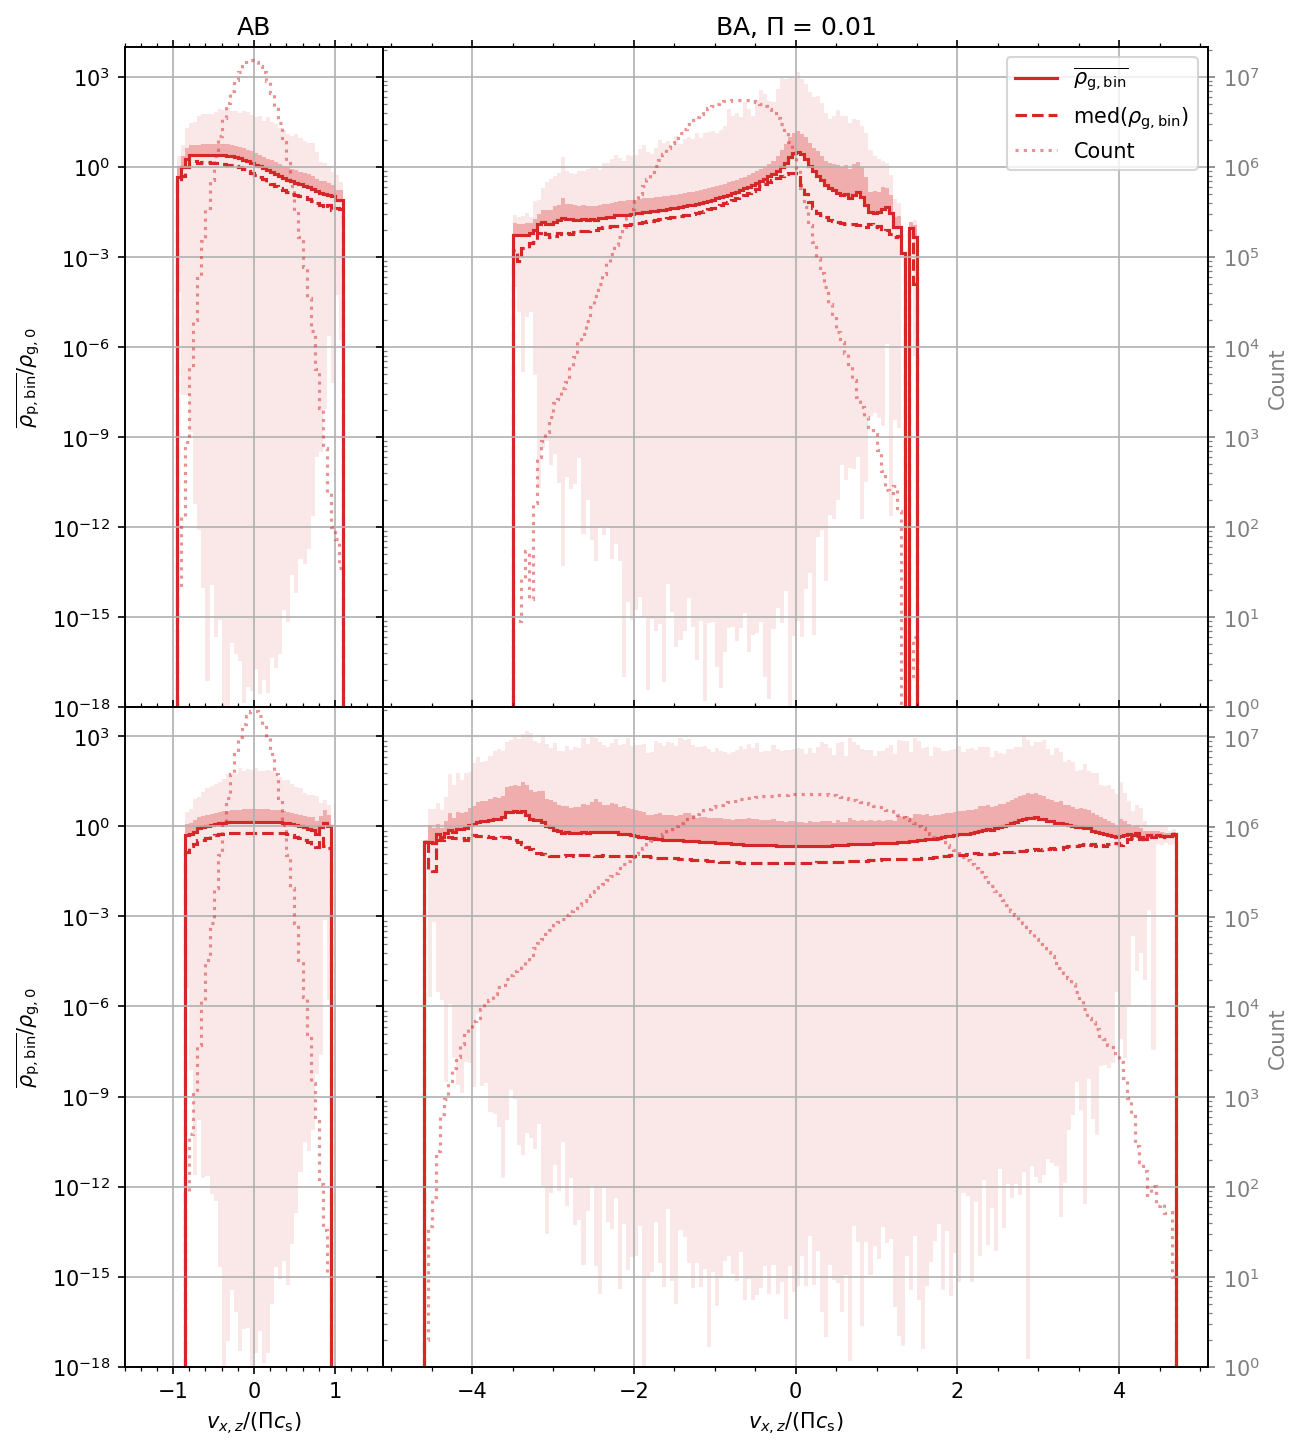

In [1]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

ABxlim, BAxlim = 1.6, 5.1
ABBArat = BAxlim/ABxlim
xylim, zylim = (1e-18, 1e4), (1e-18, 9e3)
xzrat = (np.log10(zylim[1]) - np.log10(zylim[0]))/(np.log10(xylim[1]) - (np.log10(xylim[0])))
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 11.43),
                        height_ratios=[1, xzrat], width_ratios=[1, ABBArat], dpi=150)
twin_axs = [[axs[0][0].twinx(), axs[0][1].twinx()],
            [axs[1][0].twinx(), axs[1][1].twinx()]]
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:red']]#, ['0.02', 'tab:orange'],
    #    ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']
        epsilon = athinput['problem']['epsilon']

        # Load velocity results
        npz = np.load(f'{path}/npz/velocities.npz')
        # npz['bin_edges'] = range(bin_edges.size)
        bin_avg_vxs, bin_avg_vzs = npz['bin_avg_vxs'], npz['bin_avg_vzs']

        # Load density results
        bin_hi_rhopxs = npz['bin_avg_rhopxs'] + npz['bin_std_rhopxs']
        bin_lo_rhopxs = npz['bin_avg_rhopxs']# - npz['bin_std_rhopxs']
        bin_hi_rhopzs = npz['bin_avg_rhopzs'] + npz['bin_std_rhopzs']
        bin_lo_rhopzs = npz['bin_avg_rhopzs']# - npz['bin_std_rhopzs']

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(npz['bin_max_rhopxs'], npz['bin_edges'],
                         baseline=npz['bin_min_rhopxs'], fill=True, color=Pi[1],
                         alpha=0.1)
        axs[0][i].stairs(bin_hi_rhopxs, npz['bin_edges'], baseline=bin_lo_rhopxs,
                         fill=True, color=Pi[1], alpha=0.3)
        axs[0][i].stairs(npz['bin_avg_rhopxs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         label=r'$\overline{\rho_\mathrm{g,bin}}$')
        axs[0][i].stairs(npz['bin_med_rhopxs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         ls='--', label=r'med($\rho_\mathrm{g,bin}$)')
        twin_axs[0][i].stairs(npz['bin_cnt_rhopxs'], npz['bin_edges'], color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)
        axs[1][i].stairs(npz['bin_max_rhopzs'], npz['bin_edges'],
                         baseline=npz['bin_min_rhopzs'], fill=True, color=Pi[1],
                         alpha=0.1)
        axs[1][i].stairs(bin_hi_rhopzs, npz['bin_edges'], baseline=bin_lo_rhopzs,
                         fill=True, color=Pi[1], alpha=0.3)
        axs[1][i].stairs(npz['bin_avg_rhopzs'], npz['bin_edges'], color=Pi[1], lw=1.5)
        axs[1][i].stairs(npz['bin_med_rhopzs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         ls='--')
        twin_axs[1][i].stairs(npz['bin_cnt_rhopzs'], npz['bin_edges'], color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

for ax in np.asarray(twin_axs).flat:
    ax.minorticks_on()
    ax.tick_params(axis='y', which='both', color='tab:gray',
                   labelcolor='tab:gray')

cntylim = (1e0, 2.15e7)
axs[0][0].set(title='AB', ylabel=r'$\overline{\rho_\mathrm{p,bin}} / \rho_\mathrm{g,0}$',
              yscale='log', ylim=xylim)
axs[0][1].plot([], [], color=Pi[1], ls=':', alpha=0.5, label='Count')
axs[0][1].legend(loc='upper right')
axs[0][1].set(title=f'BA, $\Pi$ = {float(Pi[0])}')
axs[1][0].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-1.6, 1.6), # xlim=(25, 29),
              ylabel=r'$\overline{\rho_\mathrm{p,bin}} / \rho_\mathrm{g,0}$',
              yscale='log', ylim=zylim)
axs[1][1].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-5.1, 5.1))
twin_axs[0][0].set(yscale='log', ylim=cntylim)
twin_axs[0][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[0][1].set(yscale='log', ylim=cntylim)
twin_axs[0][1].set_ylabel('Count',
                          alpha=0.5)
twin_axs[1][0].set(yscale='log', ylim=cntylim)
twin_axs[1][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[1][1].set(yscale='log', ylim=cntylim)
twin_axs[1][1].set_ylabel('Count',
                          alpha=0.5)
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [2]:
print(npz['bin_avg_rhopzs'][118:122])
print(npz['bin_std_rhopzs'][118:122])

[0.22210211 0.2202997  0.21966436 0.22035195]
[1.21880175 1.26088864 1.17717287 1.17396824]


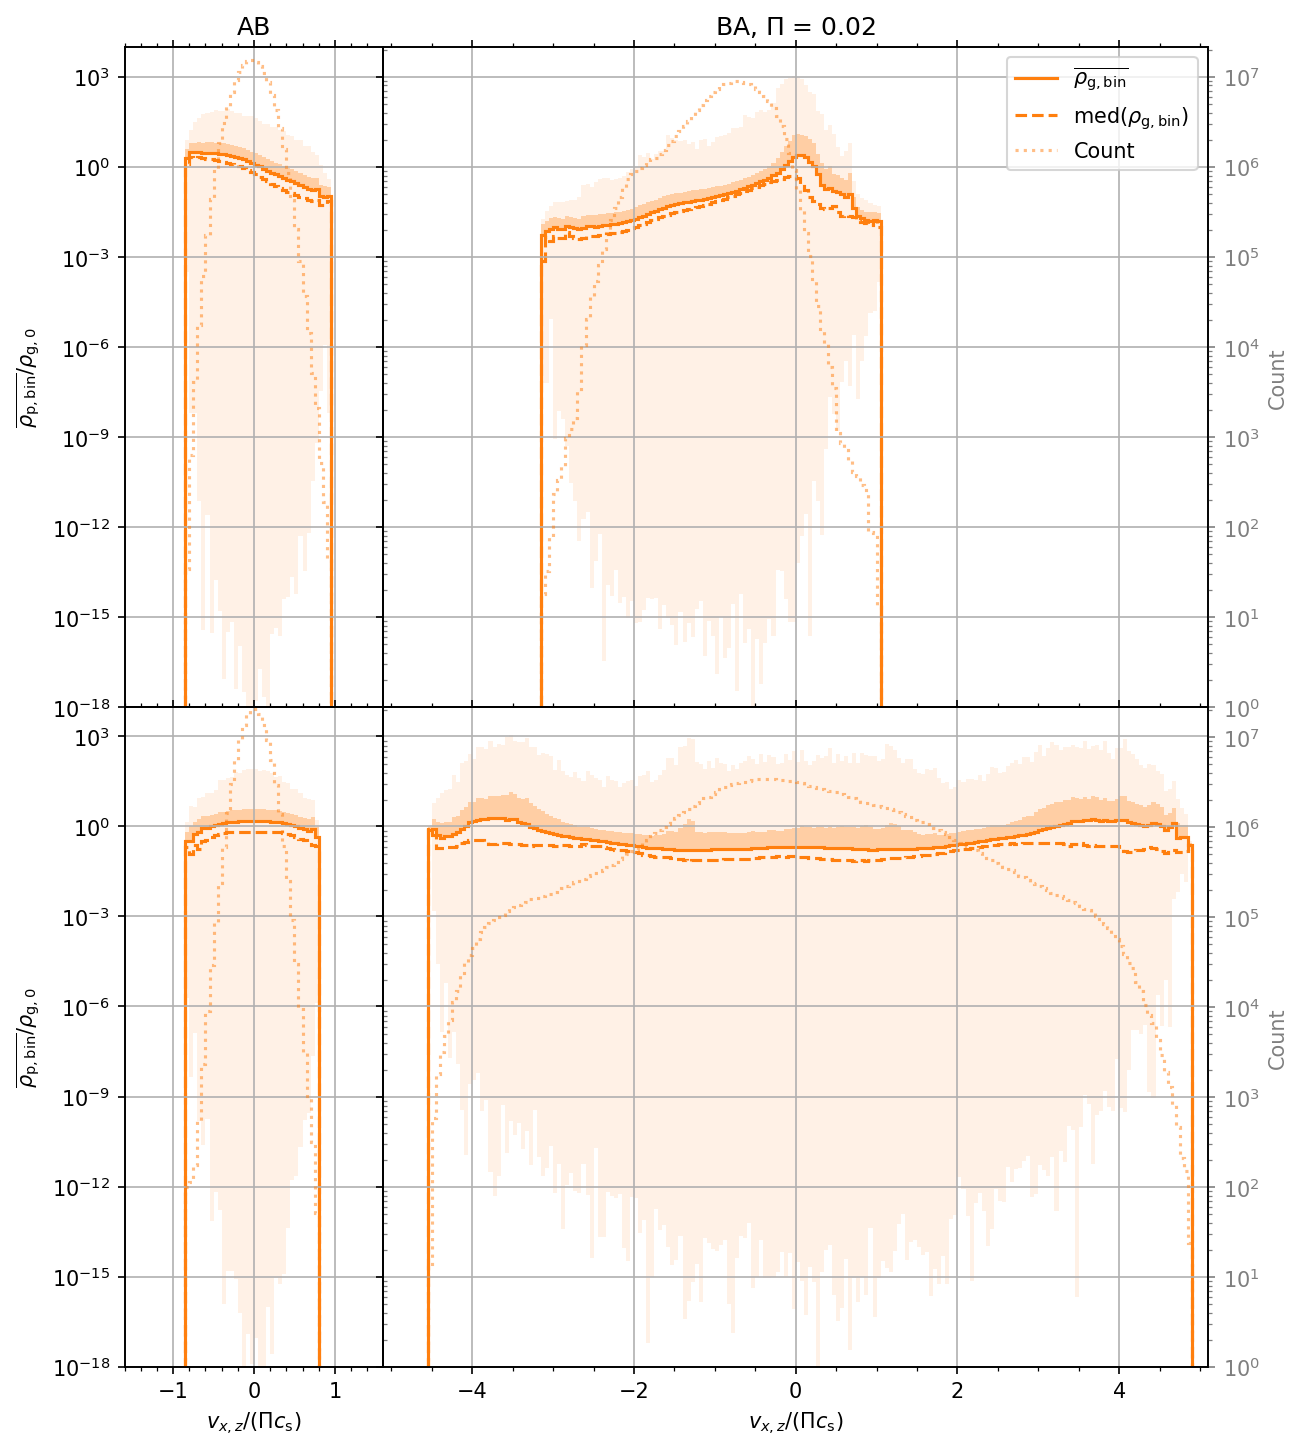

In [40]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

ABxlim, BAxlim = 1.6, 5.1
ABBArat = BAxlim/ABxlim
xylim, zylim = (1e-18, 1e4), (1e-18, 9e3)
xzrat = (np.log10(zylim[1]) - np.log10(zylim[0]))/(np.log10(xylim[1]) - (np.log10(xylim[0])))
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 11.43),
                        height_ratios=[1, xzrat], width_ratios=[1, ABBArat], dpi=150)
twin_axs = [[axs[0][0].twinx(), axs[0][1].twinx()],
            [axs[1][0].twinx(), axs[1][1].twinx()]]
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.02', 'tab:orange']]
res = 2048

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']
        epsilon = athinput['problem']['epsilon']

        # Load velocity results
        npz = np.load(f'{path}/npz/velocities.npz')
        # npz['bin_edges'] = range(bin_edges.size)
        bin_avg_vxs, bin_avg_vzs = npz['bin_avg_vxs'], npz['bin_avg_vzs']

        # Load density results
        bin_hi_rhopxs = npz['bin_avg_rhopxs'] + npz['bin_std_rhopxs']
        bin_lo_rhopxs = npz['bin_avg_rhopxs']# - npz['bin_std_rhopxs']
        bin_hi_rhopzs = npz['bin_avg_rhopzs'] + npz['bin_std_rhopzs']
        bin_lo_rhopzs = npz['bin_avg_rhopzs']# - npz['bin_std_rhopzs']

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(npz['bin_max_rhopxs'], npz['bin_edges'],
                         baseline=npz['bin_min_rhopxs'], fill=True, color=Pi[1],
                         alpha=0.1)
        axs[0][i].stairs(bin_hi_rhopxs, npz['bin_edges'], baseline=bin_lo_rhopxs,
                         fill=True, color=Pi[1], alpha=0.3)
        axs[0][i].stairs(npz['bin_avg_rhopxs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         label=r'$\overline{\rho_\mathrm{g,bin}}$')
        axs[0][i].stairs(npz['bin_med_rhopxs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         ls='--', label=r'med($\rho_\mathrm{g,bin}$)')
        twin_axs[0][i].stairs(npz['bin_cnt_rhopxs'], npz['bin_edges'], color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)
        axs[1][i].stairs(npz['bin_max_rhopzs'], npz['bin_edges'],
                         baseline=npz['bin_min_rhopzs'], fill=True, color=Pi[1],
                         alpha=0.1)
        axs[1][i].stairs(bin_hi_rhopzs, npz['bin_edges'], baseline=bin_lo_rhopzs,
                         fill=True, color=Pi[1], alpha=0.3)
        axs[1][i].stairs(npz['bin_avg_rhopzs'], npz['bin_edges'], color=Pi[1], lw=1.5)
        axs[1][i].stairs(npz['bin_med_rhopzs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         ls='--')
        twin_axs[1][i].stairs(npz['bin_cnt_rhopzs'], npz['bin_edges'], color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

for ax in np.asarray(twin_axs).flat:
    ax.minorticks_on()
    ax.tick_params(axis='y', which='both', color='tab:gray',
                   labelcolor='tab:gray')

cntylim = (1e0, 2.15e7)
axs[0][0].set(title='AB', ylabel=r'$\overline{\rho_\mathrm{p,bin}} / \rho_\mathrm{g,0}$',
              yscale='log', ylim=xylim)
axs[0][1].plot([], [], color=Pi[1], ls=':', alpha=0.5, label='Count')
axs[0][1].legend(loc='upper right')
axs[0][1].set(title=f'BA, $\Pi$ = {float(Pi[0])}')
axs[1][0].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-1.6, 1.6), # xlim=(25, 29),
              ylabel=r'$\overline{\rho_\mathrm{p,bin}} / \rho_\mathrm{g,0}$',
              yscale='log', ylim=zylim)
axs[1][1].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-5.1, 5.1))
twin_axs[0][0].set(yscale='log', ylim=cntylim)
twin_axs[0][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[0][1].set(yscale='log', ylim=cntylim)
twin_axs[0][1].set_ylabel('Count',
                          alpha=0.5)
twin_axs[1][0].set(yscale='log', ylim=cntylim)
twin_axs[1][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[1][1].set(yscale='log', ylim=cntylim)
twin_axs[1][1].set_ylabel('Count',
                          alpha=0.5)
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

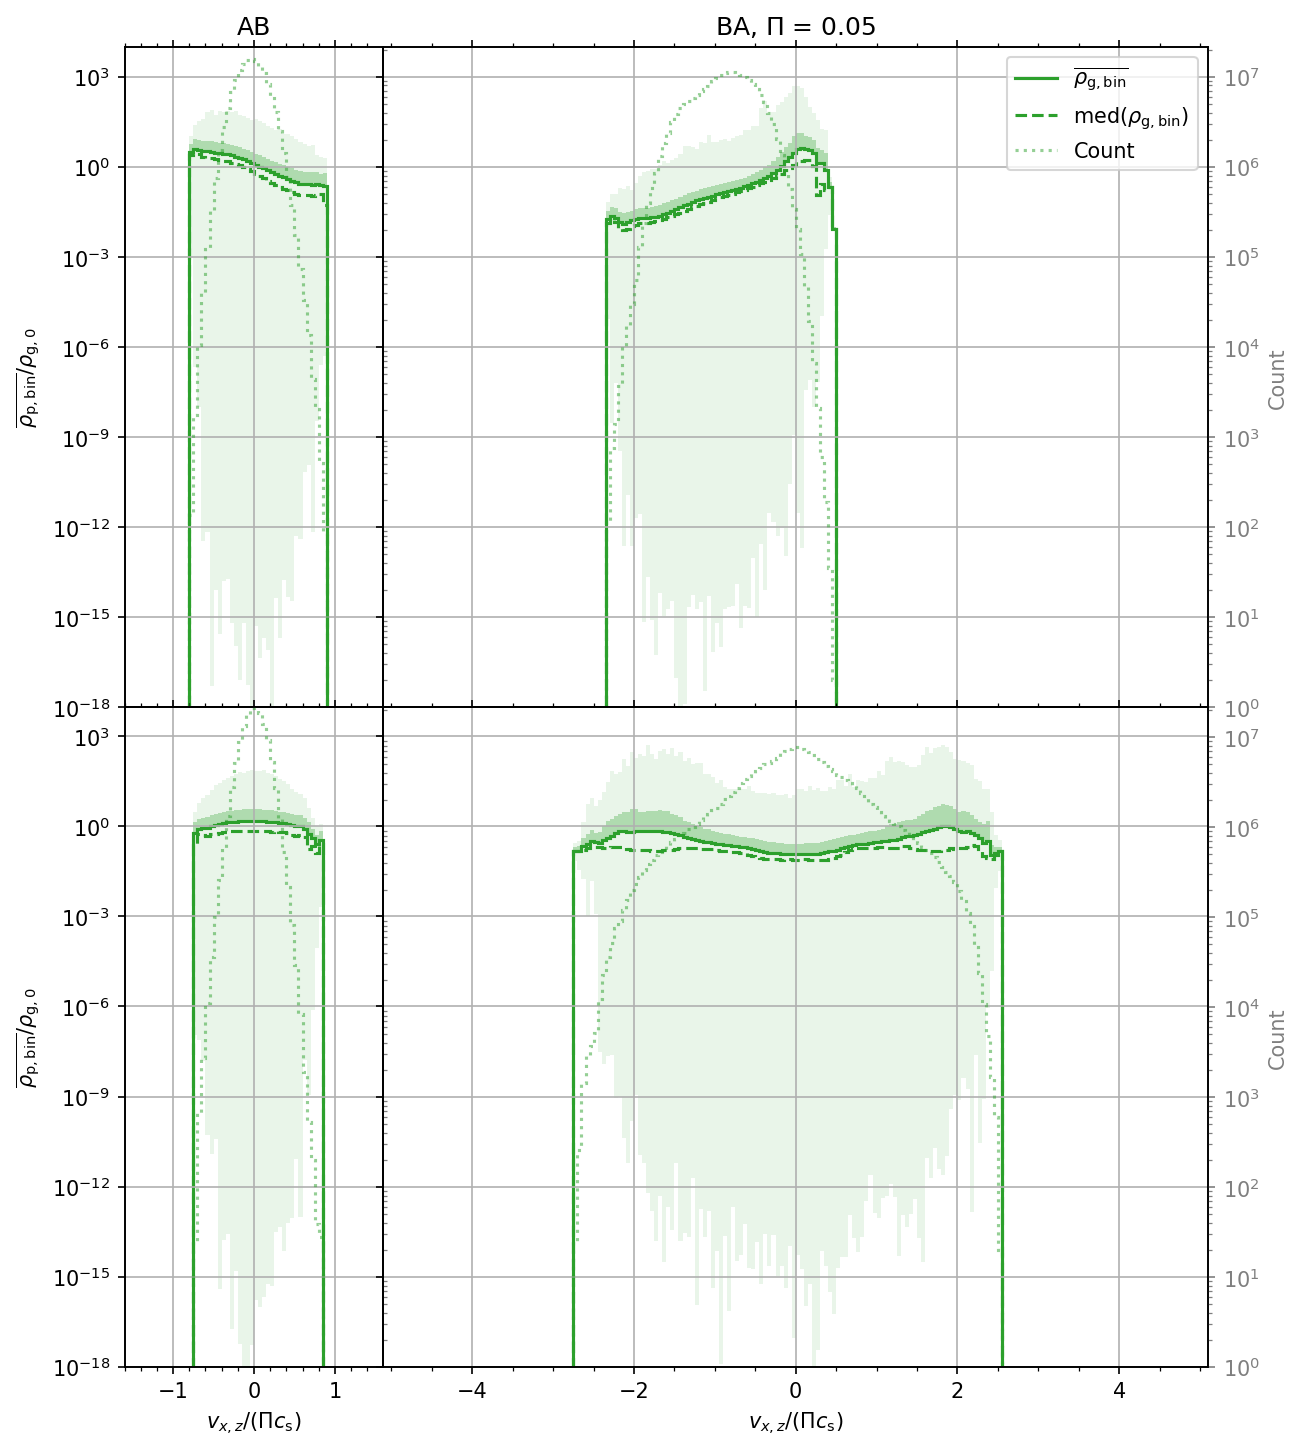

In [41]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

ABxlim, BAxlim = 1.6, 5.1
ABBArat = BAxlim/ABxlim
xylim, zylim = (1e-18, 1e4), (1e-18, 9e3)
xzrat = (np.log10(zylim[1]) - np.log10(zylim[0]))/(np.log10(xylim[1]) - (np.log10(xylim[0])))
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 11.43),
                        height_ratios=[1, xzrat], width_ratios=[1, ABBArat], dpi=150)
twin_axs = [[axs[0][0].twinx(), axs[0][1].twinx()],
            [axs[1][0].twinx(), axs[1][1].twinx()]]
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.05', 'tab:green']]
res = 2048

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']
        epsilon = athinput['problem']['epsilon']

        # Load velocity results
        npz = np.load(f'{path}/npz/velocities.npz')
        # npz['bin_edges'] = range(bin_edges.size)
        bin_avg_vxs, bin_avg_vzs = npz['bin_avg_vxs'], npz['bin_avg_vzs']

        # Load density results
        bin_hi_rhopxs = npz['bin_avg_rhopxs'] + npz['bin_std_rhopxs']
        bin_lo_rhopxs = npz['bin_avg_rhopxs']# - npz['bin_std_rhopxs']
        bin_hi_rhopzs = npz['bin_avg_rhopzs'] + npz['bin_std_rhopzs']
        bin_lo_rhopzs = npz['bin_avg_rhopzs']# - npz['bin_std_rhopzs']

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(npz['bin_max_rhopxs'], npz['bin_edges'],
                         baseline=npz['bin_min_rhopxs'], fill=True, color=Pi[1],
                         alpha=0.1)
        axs[0][i].stairs(bin_hi_rhopxs, npz['bin_edges'], baseline=bin_lo_rhopxs,
                         fill=True, color=Pi[1], alpha=0.3)
        axs[0][i].stairs(npz['bin_avg_rhopxs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         label=r'$\overline{\rho_\mathrm{g,bin}}$')
        axs[0][i].stairs(npz['bin_med_rhopxs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         ls='--', label=r'med($\rho_\mathrm{g,bin}$)')
        twin_axs[0][i].stairs(npz['bin_cnt_rhopxs'], npz['bin_edges'], color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)
        axs[1][i].stairs(npz['bin_max_rhopzs'], npz['bin_edges'],
                         baseline=npz['bin_min_rhopzs'], fill=True, color=Pi[1],
                         alpha=0.1)
        axs[1][i].stairs(bin_hi_rhopzs, npz['bin_edges'], baseline=bin_lo_rhopzs,
                         fill=True, color=Pi[1], alpha=0.3)
        axs[1][i].stairs(npz['bin_avg_rhopzs'], npz['bin_edges'], color=Pi[1], lw=1.5)
        axs[1][i].stairs(npz['bin_med_rhopzs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         ls='--')
        twin_axs[1][i].stairs(npz['bin_cnt_rhopzs'], npz['bin_edges'], color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

for ax in np.asarray(twin_axs).flat:
    ax.minorticks_on()
    ax.tick_params(axis='y', which='both', color='tab:gray',
                   labelcolor='tab:gray')

cntylim = (1e0, 2.15e7)
axs[0][0].set(title='AB', ylabel=r'$\overline{\rho_\mathrm{p,bin}} / \rho_\mathrm{g,0}$',
              yscale='log', ylim=xylim)
axs[0][1].plot([], [], color=Pi[1], ls=':', alpha=0.5, label='Count')
axs[0][1].legend(loc='upper right')
axs[0][1].set(title=f'BA, $\Pi$ = {float(Pi[0])}')
axs[1][0].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-1.6, 1.6), # xlim=(25, 29),
              ylabel=r'$\overline{\rho_\mathrm{p,bin}} / \rho_\mathrm{g,0}$',
              yscale='log', ylim=zylim)
axs[1][1].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-5.1, 5.1))
twin_axs[0][0].set(yscale='log', ylim=cntylim)
twin_axs[0][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[0][1].set(yscale='log', ylim=cntylim)
twin_axs[0][1].set_ylabel('Count',
                          alpha=0.5)
twin_axs[1][0].set(yscale='log', ylim=cntylim)
twin_axs[1][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[1][1].set(yscale='log', ylim=cntylim)
twin_axs[1][1].set_ylabel('Count',
                          alpha=0.5)
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

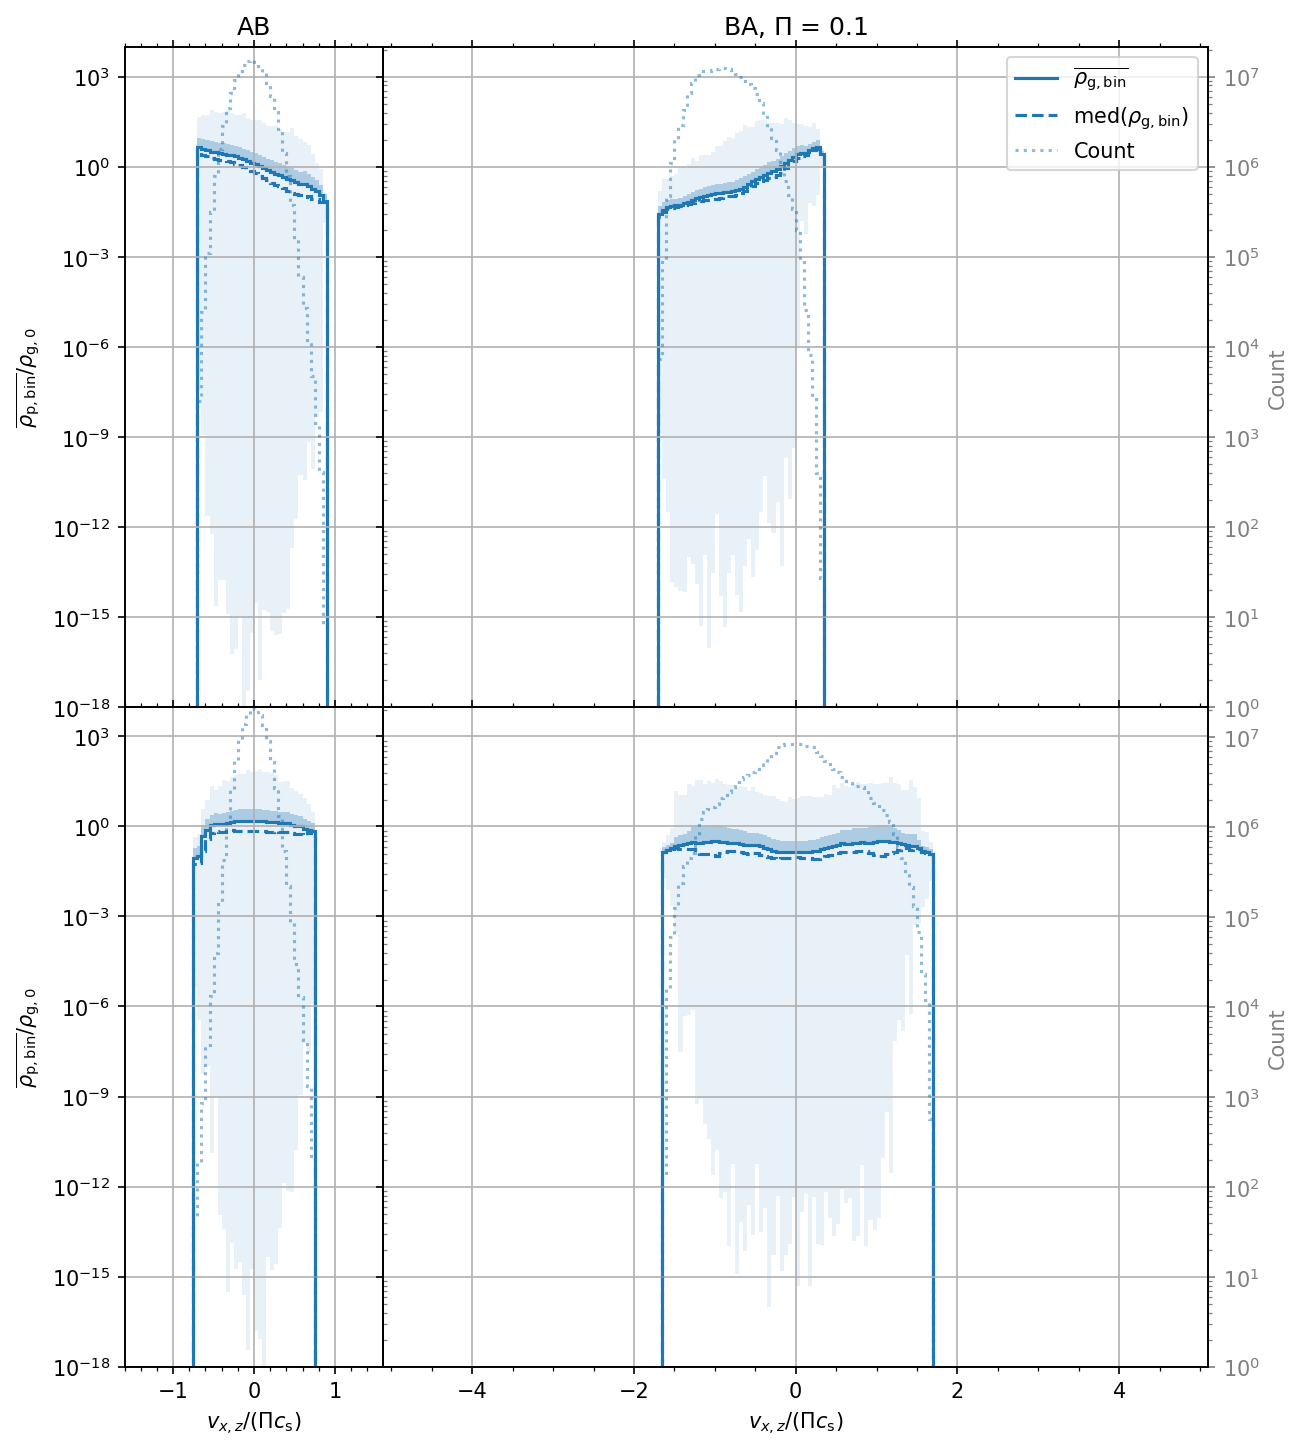

In [42]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

ABxlim, BAxlim = 1.6, 5.1
ABBArat = BAxlim/ABxlim
xylim, zylim = (1e-18, 1e4), (1e-18, 9e3)
xzrat = (np.log10(zylim[1]) - np.log10(zylim[0]))/(np.log10(xylim[1]) - (np.log10(xylim[0])))
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 11.43),
                        height_ratios=[1, xzrat], width_ratios=[1, ABBArat], dpi=150)
twin_axs = [[axs[0][0].twinx(), axs[0][1].twinx()],
            [axs[1][0].twinx(), axs[1][1].twinx()]]
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.10', 'tab:blue']]
res = 2048

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']
        epsilon = athinput['problem']['epsilon']

        # Load velocity results
        npz = np.load(f'{path}/npz/velocities.npz')
        # npz['bin_edges'] = range(bin_edges.size)
        bin_avg_vxs, bin_avg_vzs = npz['bin_avg_vxs'], npz['bin_avg_vzs']

        # Load density results
        bin_hi_rhopxs = npz['bin_avg_rhopxs'] + npz['bin_std_rhopxs']
        bin_lo_rhopxs = npz['bin_avg_rhopxs']# - npz['bin_std_rhopxs']
        bin_hi_rhopzs = npz['bin_avg_rhopzs'] + npz['bin_std_rhopzs']
        bin_lo_rhopzs = npz['bin_avg_rhopzs']# - npz['bin_std_rhopzs']

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(npz['bin_max_rhopxs'], npz['bin_edges'],
                         baseline=npz['bin_min_rhopxs'], fill=True, color=Pi[1],
                         alpha=0.1)
        axs[0][i].stairs(bin_hi_rhopxs, npz['bin_edges'], baseline=bin_lo_rhopxs,
                         fill=True, color=Pi[1], alpha=0.3)
        axs[0][i].stairs(npz['bin_avg_rhopxs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         label=r'$\overline{\rho_\mathrm{g,bin}}$')
        axs[0][i].stairs(npz['bin_med_rhopxs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         ls='--', label=r'med($\rho_\mathrm{g,bin}$)')
        twin_axs[0][i].stairs(npz['bin_cnt_rhopxs'], npz['bin_edges'], color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)
        axs[1][i].stairs(npz['bin_max_rhopzs'], npz['bin_edges'],
                         baseline=npz['bin_min_rhopzs'], fill=True, color=Pi[1],
                         alpha=0.1)
        axs[1][i].stairs(bin_hi_rhopzs, npz['bin_edges'], baseline=bin_lo_rhopzs,
                         fill=True, color=Pi[1], alpha=0.3)
        axs[1][i].stairs(npz['bin_avg_rhopzs'], npz['bin_edges'], color=Pi[1], lw=1.5)
        axs[1][i].stairs(npz['bin_med_rhopzs'], npz['bin_edges'], color=Pi[1], lw=1.5,
                         ls='--')
        twin_axs[1][i].stairs(npz['bin_cnt_rhopzs'], npz['bin_edges'], color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

for ax in np.asarray(twin_axs).flat:
    ax.minorticks_on()
    ax.tick_params(axis='y', which='both', color='tab:gray',
                   labelcolor='tab:gray')

cntylim = (1e0, 2.15e7)
axs[0][0].set(title='AB', ylabel=r'$\overline{\rho_\mathrm{p,bin}} / \rho_\mathrm{g,0}$',
              yscale='log', ylim=xylim)
axs[0][1].plot([], [], color=Pi[1], ls=':', alpha=0.5, label='Count')
axs[0][1].legend(loc='upper right')
axs[0][1].set(title=f'BA, $\Pi$ = {float(Pi[0])}')
axs[1][0].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-1.6, 1.6), # xlim=(25, 29),
              ylabel=r'$\overline{\rho_\mathrm{p,bin}} / \rho_\mathrm{g,0}$',
              yscale='log', ylim=zylim)
axs[1][1].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-5.1, 5.1))
twin_axs[0][0].set(yscale='log', ylim=cntylim)
twin_axs[0][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[0][1].set(yscale='log', ylim=cntylim)
twin_axs[0][1].set_ylabel('Count',
                          alpha=0.5)
twin_axs[1][0].set(yscale='log', ylim=cntylim)
twin_axs[1][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[1][1].set(yscale='log', ylim=cntylim)
twin_axs[1][1].set_ylabel('Count',
                          alpha=0.5)
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

## Debugging

/tmp/ipykernel_29512/2522466009.py:37: RuntimeWarning: divide by zero encountered in log
  log_uz_hists = np.log(uz_hists)
/home/stanley/miniconda3/envs/athena/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


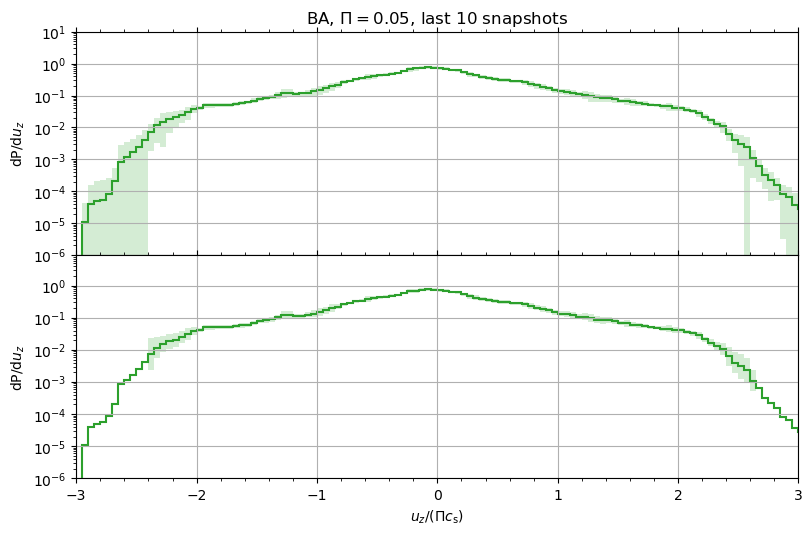

In [151]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(9.32, 5.8))
workdir = '../unstrat'
cases = ['BA']
Pis = [['0.05', 'tab:green']]
res = 2048

for i, case in enumerate(cases):
    for Pi in Pis:
        # Load velocity results
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        npz = np.load(f'{path}/npz/velocities.debug.npz')
        bin_edges = npz['bin_edges']
        # bin_edges = range(bin_edges.size)

        # Plot regular std. dev.
        bin_avg_uzs = npz['bin_avg_uzs']
        bin_std_uzs = npz['bin_std_uzs']
        bin_high_uzs = bin_avg_uzs + bin_std_uzs
        bin_low_uzs  = bin_avg_uzs - bin_std_uzs
        axs[0].stairs(bin_avg_uzs, bin_edges, color=Pi[1], lw=1.5)
        axs[0].stairs(bin_high_uzs, bin_edges, baseline=bin_low_uzs,
                         fill=True, color=Pi[1], alpha=0.2)

        # Plot regular std. dev. in log space
        # bin_log_std_uzs = npz['bin_log_std_uzs']
        # bin_high_uzs = bin_avg_uzs*bin_log_std_uzs
        # bin_low_uzs  = bin_avg_uzs/bin_log_std_uzs
        uz_hists = npz['uz_hists']
        log_uz_hists = np.log(uz_hists)
        log_std_uzs = np.std(log_uz_hists, axis=0)
        bin_exp_log_std_uzs = np.exp(log_std_uzs)
        bin_high_uzs = bin_avg_uzs*bin_exp_log_std_uzs
        bin_low_uzs  = bin_avg_uzs/bin_exp_log_std_uzs
        axs[1].stairs(bin_avg_uzs, bin_edges, color=Pi[1], lw=1.5)
        axs[1].stairs(bin_high_uzs, bin_edges, baseline=bin_low_uzs,
                         fill=True, color=Pi[1], alpha=0.2)

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.set(ylabel=r'$\mathrm{dP}/\mathrm{d}u_z$', yscale='log')
    ax.tick_params(axis='both', which='both', top=True)

axs[0].set(title=r'BA, $\Pi = 0.05$, last 10 snapshots', ylim=(1e-6, 1e1))
axs[1].set(xlim=(-3, 3), xlabel=r'$u_z/(\Pi c_\mathrm{s})$', ylim=(1e-6, 9e0))
# axs[1].set(xlim=(20, 50), xlabel=r'$u_{z,\mathrm{bin}}$', ylim=(1e-6, 9e0))
plt.subplots_adjust(hspace=0)
plt.show()

/tmp/ipykernel_29512/2159954042.py:38: RuntimeWarning: divide by zero encountered in log
  log_uz_hists = np.log(uz_hists)
/home/stanley/miniconda3/envs/athena/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


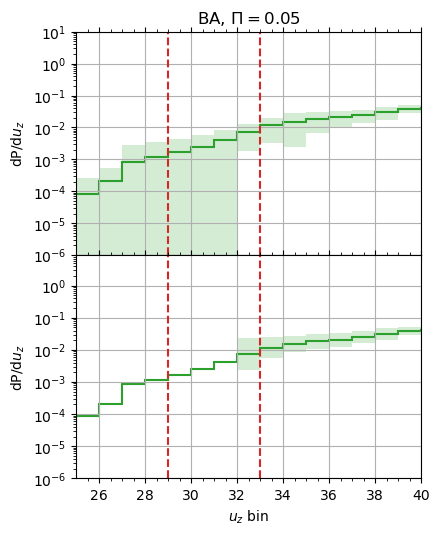

In [141]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4.45, 5.8))
workdir = '../unstrat'
cases = ['BA']
Pis = [['0.05', 'tab:green']]
res = 2048
lo_slice, hi_slice = 29, 33

for i, case in enumerate(cases):
    for Pi in Pis:
        # Load velocity results
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        npz = np.load(f'{path}/npz/velocities.debug.npz')
        bin_edges = npz['bin_edges']
        bin_edges = range(bin_edges.size)

        # Plot regular std. dev.
        bin_avg_uzs = npz['bin_avg_uzs']
        bin_std_uzs = npz['bin_std_uzs']
        bin_high_uzs = bin_avg_uzs + bin_std_uzs
        bin_low_uzs  = bin_avg_uzs - bin_std_uzs
        axs[0].stairs(bin_avg_uzs, bin_edges, color=Pi[1], lw=1.5)
        axs[0].stairs(bin_high_uzs, bin_edges, baseline=bin_low_uzs,
                         fill=True, color=Pi[1], alpha=0.2)

        # Plot regular std. dev. in log space
        # bin_log_std_uzs = npz['bin_log_std_uzs']
        # bin_high_uzs = bin_avg_uzs*bin_log_std_uzs
        # bin_low_uzs  = bin_avg_uzs/bin_log_std_uzs
        uz_hists = npz['uz_hists']
        log_uz_hists = np.log(uz_hists)
        log_std_uzs = np.std(log_uz_hists, axis=0)
        bin_exp_log_std_uzs = np.exp(log_std_uzs)
        bin_high_uzs = bin_avg_uzs*bin_exp_log_std_uzs
        bin_low_uzs  = bin_avg_uzs/bin_exp_log_std_uzs
        axs[1].stairs(bin_avg_uzs, bin_edges, color=Pi[1], lw=1.5)
        axs[1].stairs(bin_high_uzs, bin_edges, baseline=bin_low_uzs,
                         fill=True, color=Pi[1], alpha=0.2)

# Format and save figure
for ax in axs.flat:
    ax.axvline(lo_slice, c='tab:red', ls='dashed')
    ax.axvline(hi_slice, c='tab:red', ls='dashed')
    ax.grid()
    ax.minorticks_on()
    ax.set(ylabel=r'$\mathrm{dP}/\mathrm{d}u_z$', yscale='log')
    ax.tick_params(axis='both', which='both', top=True)

axs[0].set(title=r'BA, $\Pi = 0.05$', ylim=(1e-6, 1e1))
# axs[1].set(xlim=(-3, 3), xlabel=r'$u_z/(\Pi c_\mathrm{s})$', ylim=(1e-6, 9e0))
axs[1].set(xlim=(25, 40), xlabel=r'$u_z$ bin', ylim=(1e-6, 9e0))
plt.subplots_adjust(hspace=0)
plt.show()

In [142]:
uz_hists[:, lo_slice:hi_slice]

array([[0.00000000e+00, 8.07265727e-04, 1.95375685e-03, 1.01559879e-02],
       [4.91250996e-03, 5.27517302e-03, 6.25869881e-03, 8.09178340e-03],
       [3.33120712e-05, 1.76080121e-04, 6.23500590e-03, 1.09439630e-02],
       [0.00000000e+00, 0.00000000e+00, 7.53344258e-04, 5.37828671e-03],
       [3.91497849e-04, 1.78083415e-03, 2.49697755e-03, 6.13109613e-03],
       [0.00000000e+00, 1.47802780e-04, 7.96582051e-04, 1.28318298e-03],
       [7.75036603e-03, 7.85531108e-03, 8.51279946e-03, 9.07005021e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58688818e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.29193285e-04],
       [3.80989902e-03, 8.77233379e-03, 1.41540557e-02, 1.99265393e-02]])

In [143]:
log_uz_hists[:, lo_slice:hi_slice]

array([[        -inf,  -7.12185767,  -6.23800117,  -4.58969181],
       [ -5.31597027,  -5.2447438 ,  -5.07378297,  -4.81690613],
       [-10.30959073,  -8.64457143,  -5.07757575,  -4.51496729],
       [        -inf,         -inf,  -7.19098825,  -5.22538541],
       [ -7.84553054,  -6.3306734 ,  -5.99267426,  -5.09438173],
       [        -inf,  -8.81963174,  -7.13518042,  -6.65841158],
       [ -4.86001521,  -4.8465654 ,  -4.76618443,  -4.70277748],
       [        -inf,         -inf,         -inf,  -6.4459803 ],
       [        -inf,         -inf,         -inf,  -7.75360319],
       [ -5.57015259,  -4.7361524 ,  -4.25775408,  -3.9157028 ]])

In [144]:
log_std_uzs[lo_slice:hi_slice]

array([       nan,        nan,        nan, 1.13146764])

In [148]:
slices = log_uz_hists[:, lo_slice:hi_slice]
np.where(slices != -np.inf, True, False)

array([[False,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True,  True,  True],
       [False,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False, False,  True],
       [False, False, False,  True],
       [ True,  True,  True,  True]])

/tmp/ipykernel_29512/2865257151.py:37: RuntimeWarning: divide by zero encountered in log
  log_uz_hists = np.log(uz_hists)


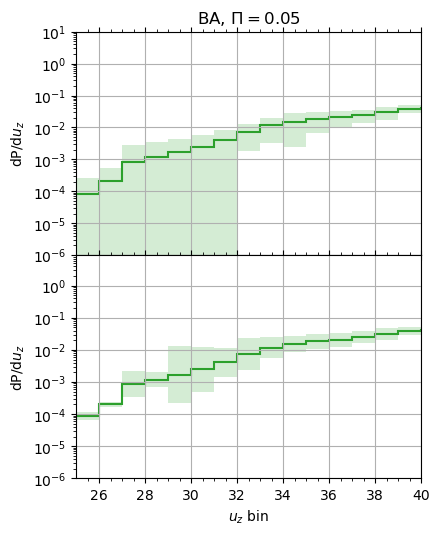

In [150]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4.45, 5.8))
workdir = '../unstrat'
cases = ['BA']
Pis = [['0.05', 'tab:green']]
res = 2048

for i, case in enumerate(cases):
    for Pi in Pis:
        # Load velocity results
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        npz = np.load(f'{path}/npz/velocities.debug.npz')
        bin_edges = npz['bin_edges']
        bin_edges = range(bin_edges.size)

        # Plot regular std. dev.
        bin_avg_uzs = npz['bin_avg_uzs']
        bin_std_uzs = npz['bin_std_uzs']
        bin_high_uzs = bin_avg_uzs + bin_std_uzs
        bin_low_uzs  = bin_avg_uzs - bin_std_uzs
        axs[0].stairs(bin_avg_uzs, bin_edges, color=Pi[1], lw=1.5)
        axs[0].stairs(bin_high_uzs, bin_edges, baseline=bin_low_uzs,
                         fill=True, color=Pi[1], alpha=0.2)

        # Plot regular std. dev. in log space
        # bin_log_std_uzs = npz['bin_log_std_uzs']
        # bin_high_uzs = bin_avg_uzs*bin_log_std_uzs
        # bin_low_uzs  = bin_avg_uzs/bin_log_std_uzs
        uz_hists = npz['uz_hists']
        log_uz_hists = np.log(uz_hists)
        keep = np.where(log_uz_hists != -np.inf, True, False)
        log_std_uzs = np.std(log_uz_hists, axis=0, where=keep)
        bin_exp_log_std_uzs = np.exp(log_std_uzs)
        bin_high_uzs = bin_avg_uzs*bin_exp_log_std_uzs
        bin_low_uzs  = bin_avg_uzs/bin_exp_log_std_uzs
        axs[1].stairs(bin_avg_uzs, bin_edges, color=Pi[1], lw=1.5)
        axs[1].stairs(bin_high_uzs, bin_edges, baseline=bin_low_uzs,
                         fill=True, color=Pi[1], alpha=0.2)

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.set(ylabel=r'$\mathrm{dP}/\mathrm{d}u_z$', yscale='log')
    ax.tick_params(axis='both', which='both', top=True)

axs[0].set(title=r'BA, $\Pi = 0.05$', ylim=(1e-6, 1e1))
# axs[1].set(xlim=(-3, 3), xlabel=r'$u_z/(\Pi c_\mathrm{s})$', ylim=(1e-6, 9e0))
axs[1].set(xlim=(25, 40), xlabel=r'$u_z$ bin', ylim=(1e-6, 9e0))
plt.subplots_adjust(hspace=0)
plt.show()

- The above method (i.e., removing samples) is invalid, as it artificially narrows the standard deviation and hides the fact that, for many if not most of the snapshots, the bins in these tails are empty.